In [23]:
import tensorflow as tf
from tensorflow import keras

# 28*28 images of hand-written digits 0-9
mnist_dataset = keras.datasets.mnist

# unpack the mnist dataset into train/test subsets
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()
x_train = keras.utils.normalize(x_train, axis = 1)

model = keras.models.Sequential()

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation = tf.nn.relu))
model.add(keras.layers.Dense(128, activation = tf.nn.relu))
model.add(keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'] )

model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2652 - accuracy: 0.9225
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1064 - accuracy: 0.9668
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0740 - accuracy: 0.9766


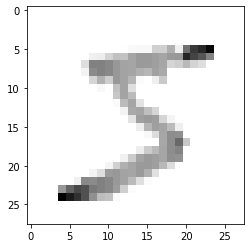

In [22]:
from matplotlib import pyplot
# print(x_train[0])
pyplot.imshow(x_train[0], cmap = pyplot.cm.binary)
pyplot.show()

In [26]:
validation_loss, validation_acc = model.evaluate(x_test, y_test)
print("Validation loss: ", validation_loss)
print("Validation accuracy", validation_acc)

313/313 [==============================] - 0s 867us/step - loss: 64.1185 - accuracy: 0.9525
Validation loss:  64.11854553222656
Validation accuracy 0.9524999856948853


In [29]:
model.save('keras_mnist_demo')
new_model = keras.models.load_model('keras_mnist_demo')

INFO:tensorflow:Assets written to: keras_mnist_demo/assets


In [30]:
predictions = new_model.predict([x_test])
print(predictions)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [31]:
import numpy as np
print(np.argmax(predictions[0]))

7


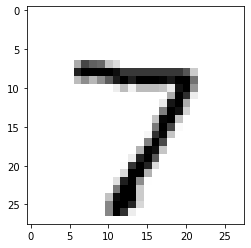

In [32]:
pyplot.imshow(x_test[0], cmap = pyplot.cm.binary)
pyplot.show()